In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import glob  # Add this line to import the glob module
from google.colab import drive

In [ ]:
# Step 1: Load and Inspect Data
#from google.colab import drive
#drive.mount('/content/drive')

file_paths = glob.glob('/content/drive/My Drive/AI_Recruitment_Project/*.xlsx')  # Adjust path if needed
datasets = [pd.read_excel(path) for path in file_paths]
final_data = pd.concat(datasets, ignore_index=True)

# Initial inspection
print(final_data.head())
print(final_data.info())

          ID          Name               Role  \
0  brenbr359   Brent Brown    Product Manager   
1  jameay305   James Ayala  Software Engineer   
2  scotri565  Scott Rivera      Data Engineer   
3  emilke232   Emily Kelly        UI Engineer   
4  ashlra638    Ashley Ray     Data Scientist   

                                          Transcript  \
0  Product Manager Interview Transcript\n\nInterv...   
1  Software Engineer Interview Transcript\n\nInte...   
2  Here is a simulated interview for Scott Rivera...   
3  Interview Transcript: Emily Kelly for UI Engin...   
4  Data Scientist Interview Transcript\n\nCompany...   

                                              Resume decision  \
0  Here's a sample resume for Brent Brown applyin...   select   
1  Here's a sample resume for James Ayala applyin...   select   
2  Here's a sample resume for Scott Rivera applyi...   reject   
3  Here's a sample resume for Emily Kelly:\n\nEmi...   select   
4  Here's a sample resume for Ashley Ray ap

In [ ]:

# Step 2: Data Cleaning
final_data.columns = [col.strip().lower().replace(" ", "_") for col in final_data.columns]  # Standardize column names
final_data.fillna("Unknown", inplace=True)  # Handle missing values
final_data.drop_duplicates(inplace=True)  # Remove duplicates

In [ ]:
# Step 3: Feature Engineering
# Resume and JD Similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
final_data['resume_jd_similarity'] = final_data.apply(
    lambda x: cosine_similarity(
        tfidf_vectorizer.fit_transform([x['resume'], x['job_description']])
    )[0, 1],
    axis=1
)

# Resume and Transcript Similarity
final_data['resume_transcript_similarity'] = final_data.apply(
    lambda x: cosine_similarity(
        tfidf_vectorizer.fit_transform([x['resume'], x['transcript']])
    )[0, 1],
    axis=1
)

# Sentiment Analysis and Polarity
final_data['transcript_sentiment'] = final_data['transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Transcript Length
final_data['transcript_length'] = final_data['transcript'].apply(len)


In [ ]:
final_data = final_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
final_data = final_data.applymap(lambda x: str(x).replace("**", "") if isinstance(x, str) else x)
final_data = final_data.applymap(lambda x: str(x).replace("rejected", "reject") if isinstance(x, str) else x)
final_data = final_data.applymap(lambda x: str(x).replace("selected", "select") if isinstance(x, str) else x)

<ipython-input-20-fc3f2175b7be>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_data = final_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-20-fc3f2175b7be>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_data = final_data.applymap(lambda x: str(x).replace("**", "") if isinstance(x, str) else x)
<ipython-input-20-fc3f2175b7be>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_data = final_data.applymap(lambda x: str(x).replace("rejected", "reject") if isinstance(x, str) else x)
<ipython-input-20-fc3f2175b7be>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_data = final_data.applymap(lambda x: str(x).replace("selected", "select") if isinstance(x, str) else x)


In [ ]:
final_data

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,resume_jd_similarity,resume_transcript_similarity,transcript_sentiment,transcript_length
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,select,experience,we are looking for a skilled product manager w...,0.251458,0.232282,0.107568,3687
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,select,experience,we are looking for a skilled software engineer...,0.219177,0.187723,0.091728,4262
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,reject,experience,we are looking for a skilled data engineer wit...,0.356183,0.357967,0.060836,2956
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,select,experience,we are looking for a skilled ui engineer with ...,0.325579,0.216645,0.100418,4310
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,reject,cultural fit,we are looking for a skilled data scientist wi...,0.306289,0.200212,0.042577,3307
...,...,...,...,...,...,...,...,...,...,...,...,...
3245,kotasai196,mahin tiwari,software developer,"interviewer: rohan desai, technical lead\ncand...",here's a detailed dummy resume for mahin tiwar...,select,"adaptability, strong technical knowledge","expected_experience : 9+ years, domains: web d...",0.076619,0.224386,0.191294,3688
3246,kotasai197,yashika gupta,software developer,"interviewer: hi yashika, thanks for coming in ...",here's a detailed dummy resume for yashika gup...,select,"strong technical knowledge, proven leadership ...","expected_experience : 0-2 years, domains: web ...",0.106851,0.298120,0.268455,4940
3247,kotasai198,rachna rathore,software developer,interview transcript\n\nrachna rathore\nsoftwa...,here's a detailed dummy resume for candidate r...,select,"strong technical knowledge, high enthusiasm fo...","expected_experience : 0-2 years, domains: web ...",0.163433,0.261917,0.275227,4656
3248,kotasai199,janki garg,software developer,"interview transcript\n\ninterviewer: rohan, te...",here's a detailed dummy resume for janki garg:...,reject,"low problem-solving abilities, inability to co...","expected_experience : 0-2 years, domains: web ...",0.065690,0.262080,0.139286,4827


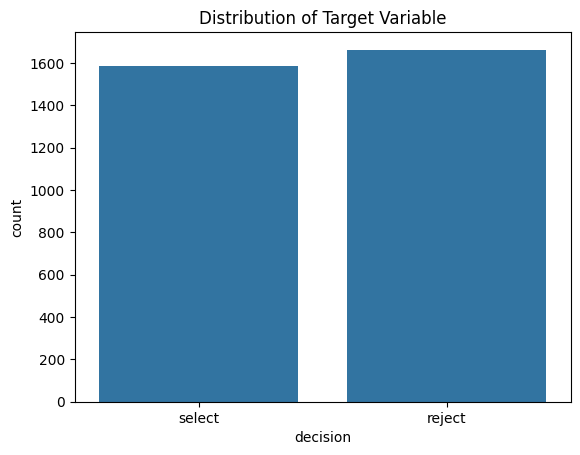

In [ ]:
# Step 4: Exploratory Data Analysis
# Plot the distribution of the target variable
sns.countplot(x='decision', data=final_data)
plt.title("Distribution of Target Variable")
plt.show()



In [ ]:
# Step 5: Train-Test Split

# Define features (X) and target (y)
X = final_data[['resume_jd_similarity', 'resume_transcript_similarity', 'transcript_sentiment', 'transcript_length']]
y = final_data['decision']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the preprocessed data to CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Data preprocessing and train-test split completed!")


Data preprocessing and train-test split completed!


Model Building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import shap


2. Load Preprocessed Data

In [ ]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Convert to 1D array
y_test = pd.read_csv("y_test.csv").values.ravel()


3. Training and Evaluating Different Models

3.1 Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [ ]:
logistic_params = {"C": [0.01, 0.1, 1, 10]}

# Create and train the model using GridSearchCV
logistic_model = LogisticRegression(max_iter=1000)
grid_search_logistic = GridSearchCV(logistic_model, logistic_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)

best_logistic_model = grid_search_logistic.best_estimator_


In [ ]:

# Predict and Evaluate
y_pred_logistic = best_logistic_model.predict(X_test)
y_pred_proba_logistic = best_logistic_model.predict_proba(X_test)[:, 1]

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

print(f"Logistic Regression - Accuracy: {accuracy_logistic:.4f}, ROC-AUC: {roc_auc_logistic:.4f}\n")


Logistic Regression - Accuracy: 0.6800, ROC-AUC: 0.7089



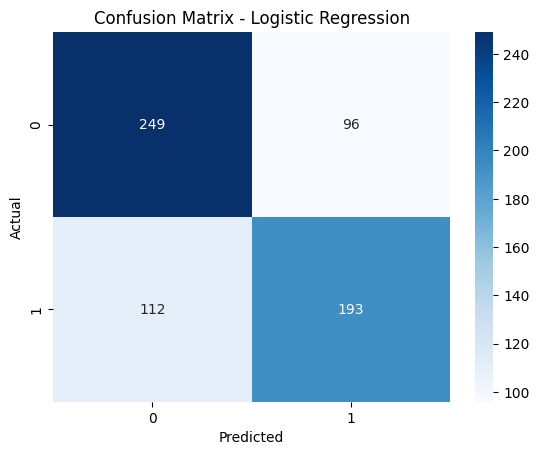

In [ ]:

# Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


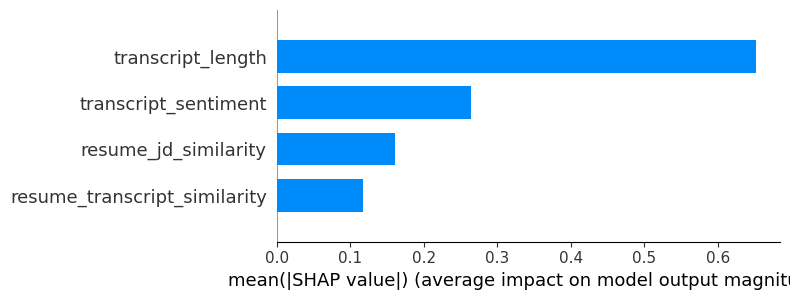

In [ ]:

# SHAP Analysis
explainer_logistic = shap.Explainer(best_logistic_model, X_train)
shap_values_logistic = explainer_logistic(X_test)
shap.summary_plot(shap_values_logistic, X_test, plot_type="bar")


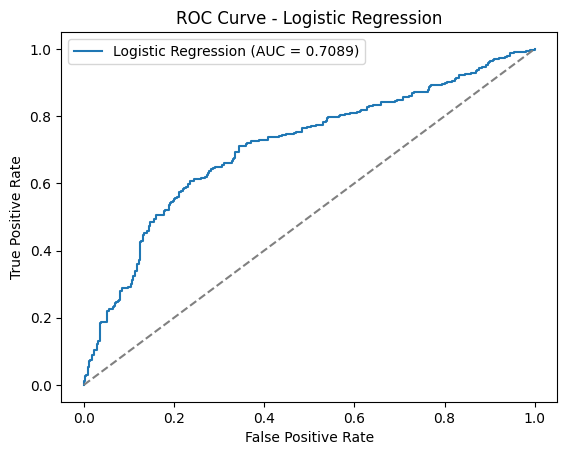

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_proba_logistic are already defined

# Convert y_test to numeric values if necessary
label_mapping = {'reject': 0, 'select': 1}
y_test_numeric = np.vectorize(label_mapping.get)(y_test)

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_numeric, y_pred_proba_logistic, pos_label=1)  # Specify pos_label as 1
roc_auc_logistic = roc_auc_score(y_test_numeric, y_pred_proba_logistic)

plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {roc_auc_logistic:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

3.2 Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree_params = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}

# Create and train the model using GridSearchCV
decision_tree_model = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(decision_tree_model, decision_tree_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_decision_tree.fit(X_train, y_train)

best_decision_tree_model = grid_search_decision_tree.best_estimator_

In [ ]:
# Predict and Evaluate
y_pred_decision_tree = best_decision_tree_model.predict(X_test)
y_pred_proba_decision_tree = best_decision_tree_model.predict_proba(X_test)[:, 1]

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
roc_auc_decision_tree = roc_auc_score(y_test, y_pred_proba_decision_tree)

print(f"Decision Tree - Accuracy: {accuracy_decision_tree:.4f}, ROC-AUC: {roc_auc_decision_tree:.4f}\n")

Decision Tree - Accuracy: 0.7308, ROC-AUC: 0.7973



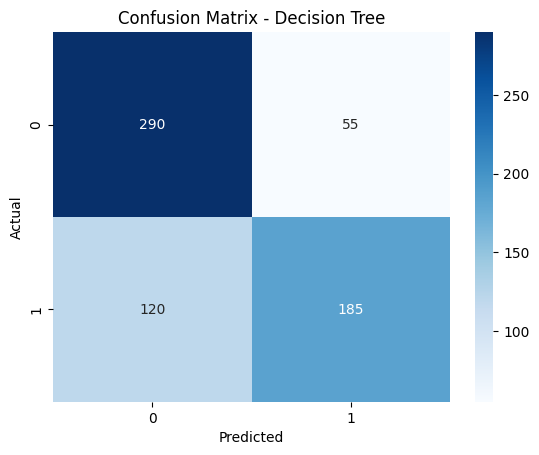

In [ ]:
# Confusion Matrix
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


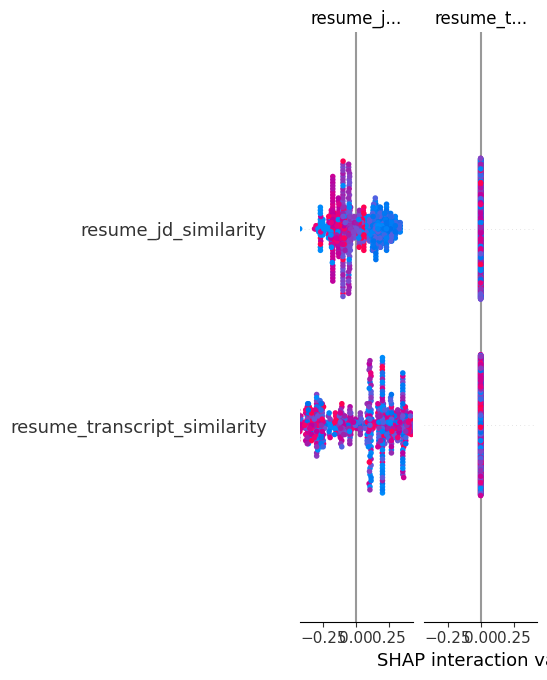

In [ ]:
import shap

# If X_train is a DataFrame, ensure that X_test is also a DataFrame and has the same column names
# If it's already a DataFrame, just pass the DataFrame directly
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_test.shape[1])]

# Create a SHAP explainer for the decision tree model
explainer_decision_tree = shap.Explainer(best_decision_tree_model, X_train)

# Calculate SHAP values for X_test
shap_values_decision_tree = explainer_decision_tree(X_test)

# Plot the summary plot (bar plot)
shap.summary_plot(shap_values_decision_tree, X_test, plot_type="bar", feature_names=feature_names)


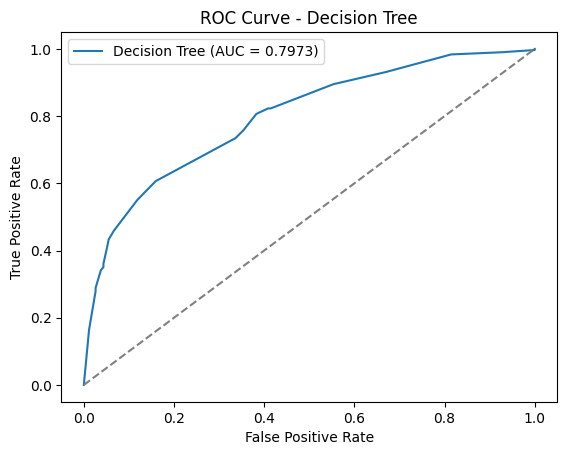

In [ ]:
# Map 'reject' -> 0 and 'select' -> 1 for binary classification
y_test_binary = np.where(y_test == 'reject', 0, 1)

# Predict probabilities
y_pred_proba_decision_tree = best_decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test_binary, y_pred_proba_decision_tree)

# Plot ROC Curve
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f"Decision Tree (AUC = {roc_auc_decision_tree:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title(f"ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


3.3 Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest_params = {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}

# Create and train the model using GridSearchCV
random_forest_model = RandomForestClassifier()
grid_search_random_forest = GridSearchCV(random_forest_model, random_forest_params, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train)

best_random_forest_model = grid_search_random_forest.best_estimator_


In [ ]:
# Predict and Evaluate
y_pred_random_forest = best_random_forest_model.predict(X_test)
y_pred_proba_random_forest = best_random_forest_model.predict_proba(X_test)[:, 1]

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_pred_proba_random_forest)

print(f"Random Forest - Accuracy: {accuracy_random_forest:.4f}, ROC-AUC: {roc_auc_random_forest:.4f}\n")

Random Forest - Accuracy: 0.7415, ROC-AUC: 0.8219



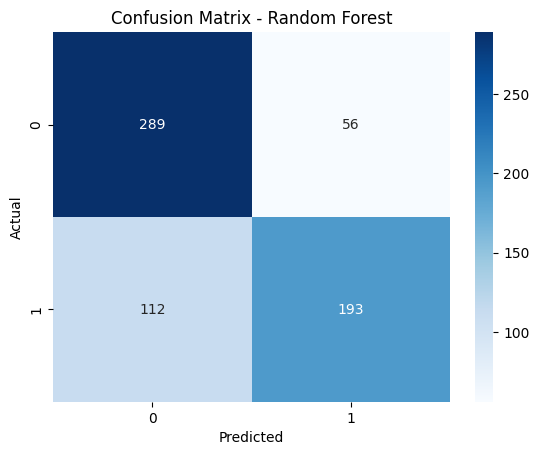

In [ ]:
# Confusion Matrix
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

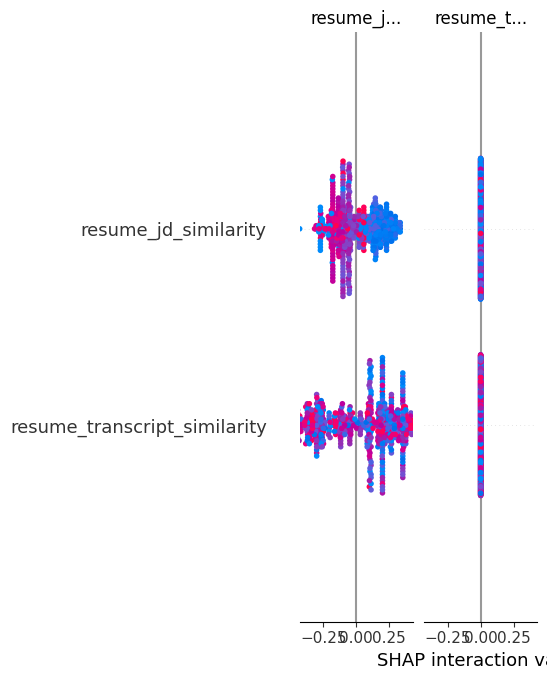

In [ ]:
import shap

# If X_train is a DataFrame, ensure that X_test is also a DataFrame and has the same column names
# If it's already a DataFrame, just pass the DataFrame directly
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_test.shape[1])]

# Create a SHAP explainer for the decision tree model
explainer_decision_tree = shap.Explainer(best_decision_tree_model, X_train)

# Calculate SHAP values for X_test
shap_values_decision_tree = explainer_decision_tree(X_test)

# Plot the summary plot (bar plot)
shap.summary_plot(shap_values_decision_tree, X_test, plot_type="bar", feature_names=feature_names)


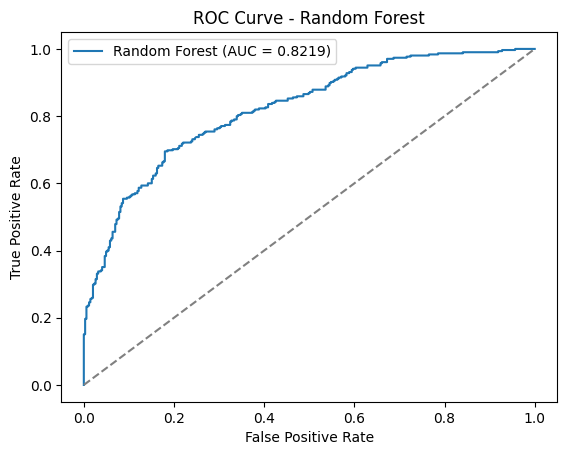

In [ ]:
# Map 'reject' -> 0 and 'select' -> 1 for binary classification
y_test_binary = np.where(y_test == 'reject', 0, 1)

# Predict probabilities
y_pred_proba_random_forest = best_random_forest_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test_binary, y_pred_proba_random_forest)

# Plot ROC Curve
plt.plot(fpr_random_forest, tpr_random_forest, label=f"Random Forest (AUC = {roc_auc_random_forest:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


3.4 SVM

In [ ]:
pip install --upgrade xgboost scikit-learn


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize SVM model
svm_model = SVC(probability=True, random_state=42)

In [ ]:
# Train the model
svm_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test_encoded, y_pred)
roc_auc_svm = roc_auc_score(y_test_encoded, y_pred_proba)

# Print accuracy and ROC AUC
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print(f"ROC AUC: {roc_auc_svm:.4f}")

Accuracy: 64.46%
ROC AUC: 0.6803


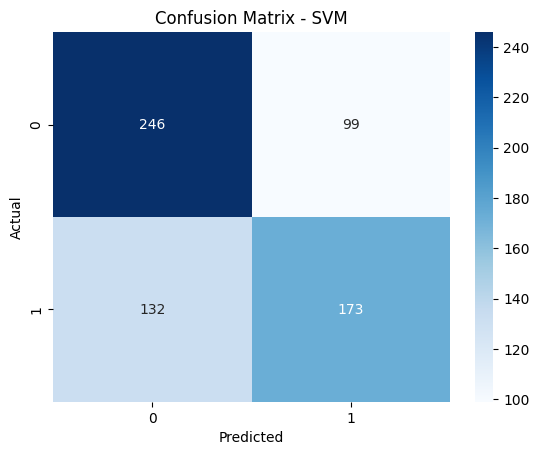

In [ ]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

  0%|          | 0/650 [00:00<?, ?it/s]

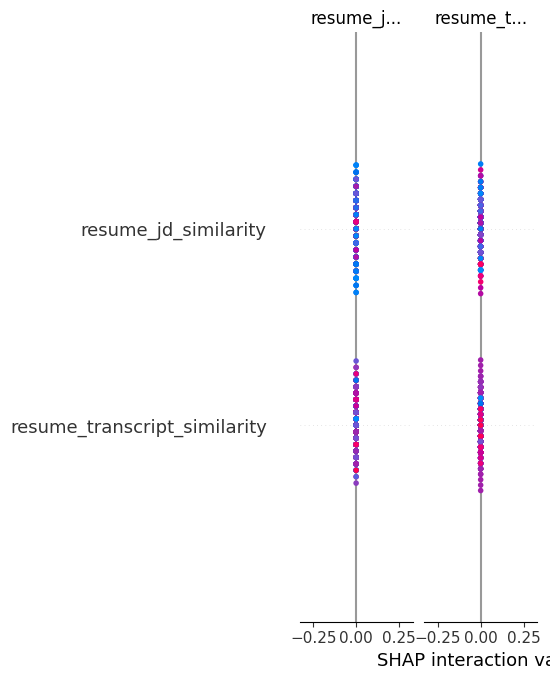

In [ ]:
import shap
import numpy as np

# SHAP Analysis with KernelExplainer for SVM
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, X_train)
shap_values_svm = explainer_svm.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values_svm, X_test, plot_type="bar")


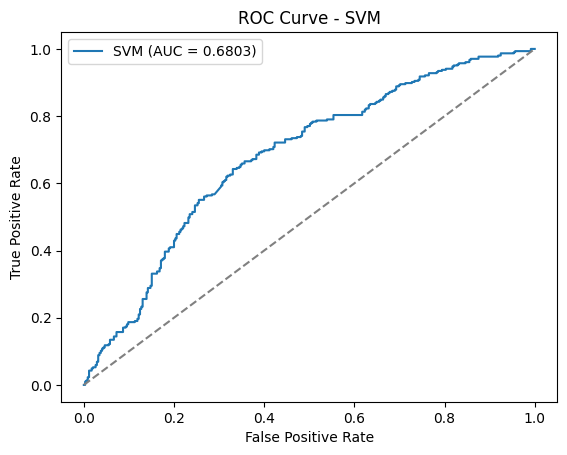

In [ ]:
# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

3.5 K - Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import shap
import matplotlib.pyplot as plt

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict and Evaluate
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"KNN - Accuracy: {accuracy_knn:.4f}, ROC-AUC: {roc_auc_knn:.4f}\n")

KNN - Accuracy: 0.6077, ROC-AUC: 0.6237



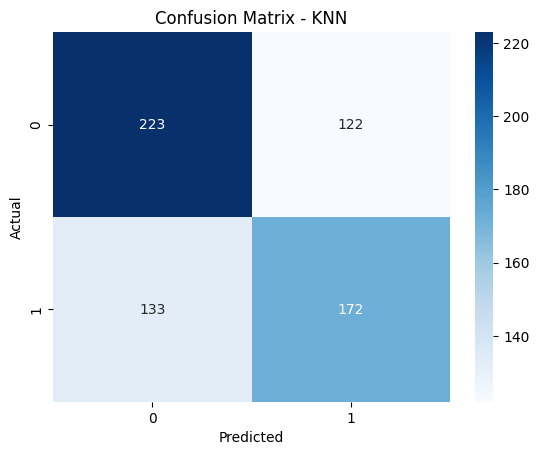

In [ ]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


  0%|          | 0/650 [00:00<?, ?it/s]

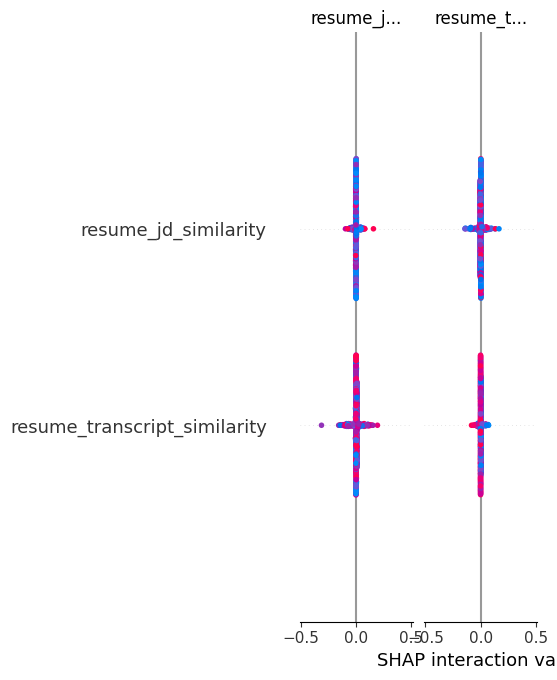

In [ ]:
import shap

# SHAP Analysis with KernelExplainer for KNN
explainer_knn = shap.KernelExplainer(knn_model.predict_proba, X_train)
shap_values_knn = explainer_knn.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values_knn, X_test, plot_type="bar")


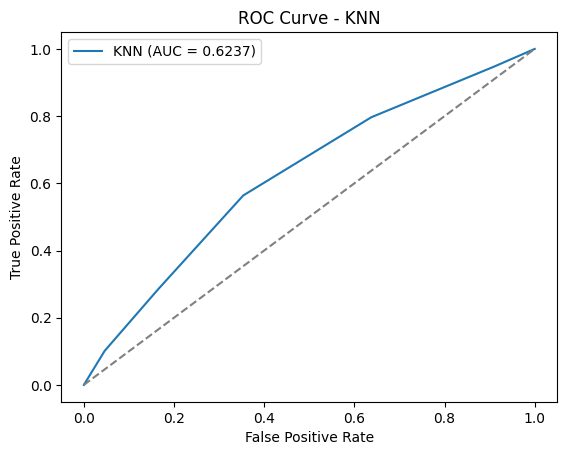

In [ ]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

3.6 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import shap
import matplotlib.pyplot as plt

In [ ]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict and Evaluate
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, ROC-AUC: {roc_auc_nb:.4f}\n")

Naive Bayes - Accuracy: 0.6954, ROC-AUC: 0.7067



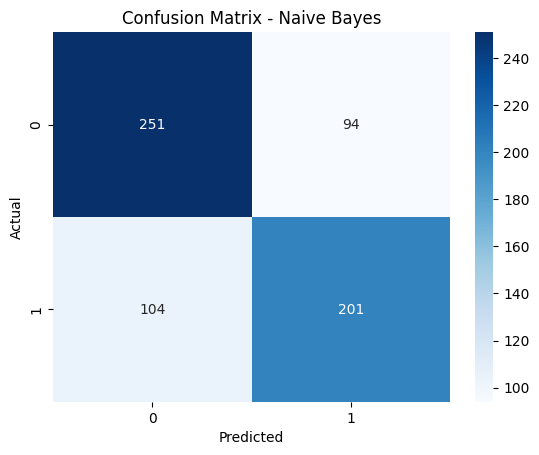

In [ ]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

  0%|          | 0/650 [00:00<?, ?it/s]

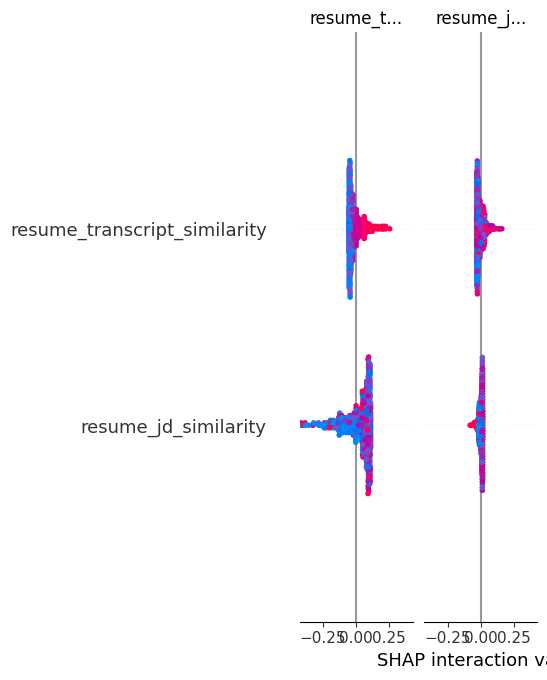

In [ ]:
import shap

# SHAP Analysis with KernelExplainer for Naive Bayes
explainer_nb = shap.KernelExplainer(nb_model.predict_proba, X_train)
shap_values_nb = explainer_nb.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values_nb, X_test, plot_type="bar")


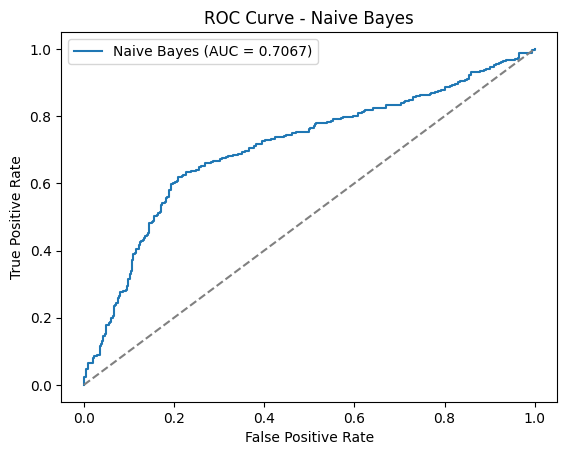

In [ ]:
# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

3.7 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import shap
import matplotlib.pyplot as plt

In [ ]:
# Initialize Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predict and Evaluate
y_pred_gbm = gbm_model.predict(X_test)
y_pred_proba_gbm = gbm_model.predict_proba(X_test)[:, 1]

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)

print(f"Gradient Boosting - Accuracy: {accuracy_gbm:.4f}, ROC-AUC: {roc_auc_gbm:.4f}\n")


Gradient Boosting - Accuracy: 0.7523, ROC-AUC: 0.8299



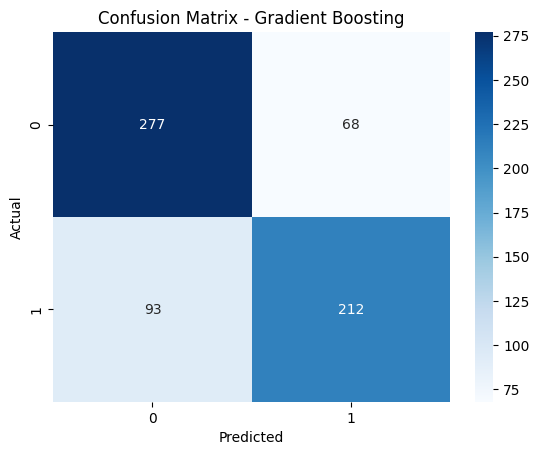

In [ ]:
# Confusion Matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

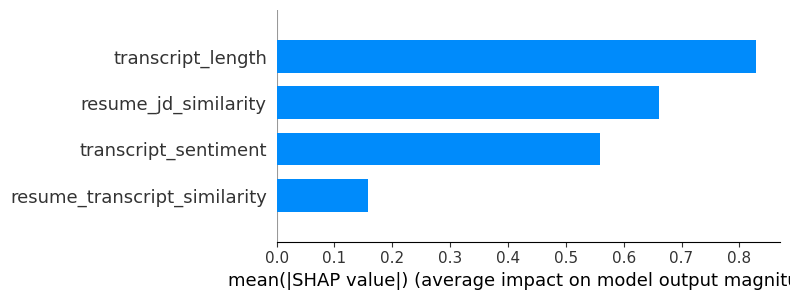

In [ ]:
# SHAP Analysis
explainer_gbm = shap.Explainer(gbm_model, X_train)
shap_values_gbm = explainer_gbm(X_test)
shap.summary_plot(shap_values_gbm, X_test, plot_type="bar")


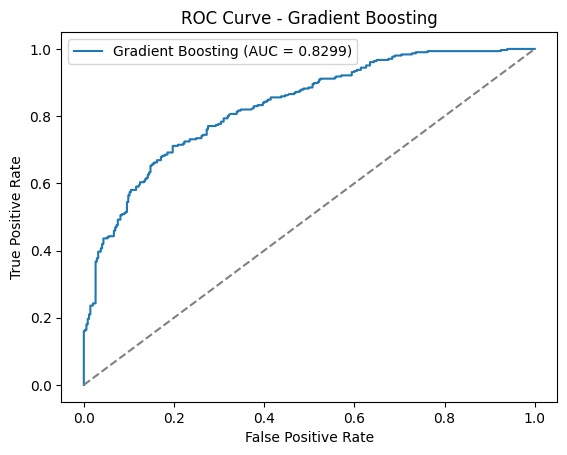

In [ ]:
# ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_proba_gbm)
plt.plot(fpr_gbm, tpr_gbm, label=f"Gradient Boosting (AUC = {roc_auc_gbm:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

3.8 LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import shap
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1282, number of negative: 1318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493077 -> initscore=-0.027694
[LightGBM] [Info] Start training from score -0.027694


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

In [ ]:
# Predict and Evaluate
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

print(f"LightGBM - Accuracy: {accuracy_lgb:.4f}, ROC-AUC: {roc_auc_lgb:.4f}\n")

LightGBM - Accuracy: 0.7231, ROC-AUC: 0.8137



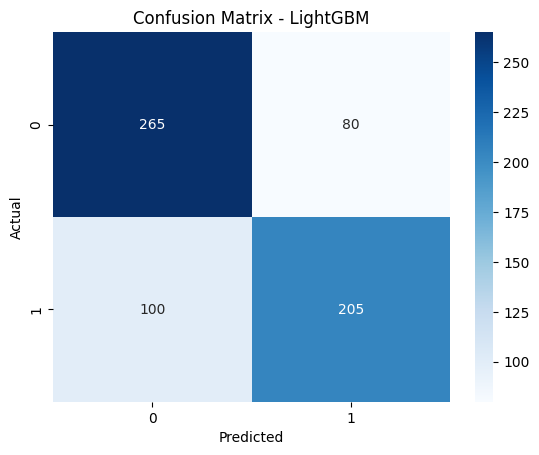

In [ ]:
# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

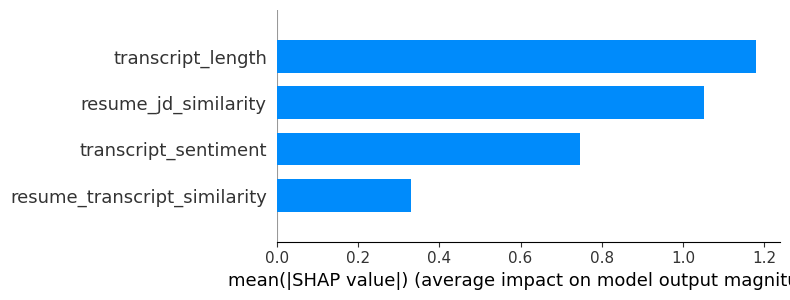

In [ ]:
# SHAP Analysis
explainer_lgb = shap.Explainer(lgb_model, X_train)
shap_values_lgb = explainer_lgb(X_test)
shap.summary_plot(shap_values_lgb, X_test, plot_type="bar")

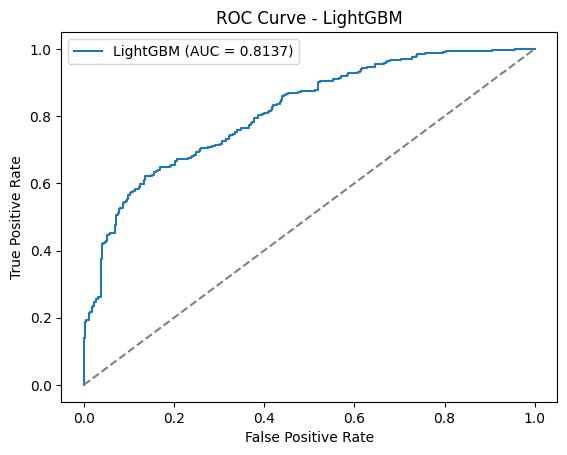

In [ ]:

# ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC = {roc_auc_lgb:.4f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
print(f"Logistic Regression - Accuracy: {accuracy_logistic:.4f}, ROC-AUC: {roc_auc_logistic:.4f}\n")
print(f"Decision Tree - Accuracy: {accuracy_decision_tree:.4f}, ROC-AUC: {roc_auc_decision_tree:.4f}\n")
print(f"Random Forest - Accuracy: {accuracy_random_forest:.4f}, ROC-AUC: {roc_auc_random_forest:.4f}\n")
print(f"SVM - Accuracy: {accuracy_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}\n")
print(f"KNN - Accuracy: {accuracy_knn:.4f}, ROC-AUC: {roc_auc_knn:.4f}\n")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, ROC-AUC: {roc_auc_nb:.4f}\n")
print(f"Gradient Boosting - Accuracy: {accuracy_gbm:.4f}, ROC-AUC: {roc_auc_gbm:.4f}\n")
print(f"LightGBM - Accuracy: {accuracy_lgb:.4f}, ROC-AUC: {roc_auc_lgb:.4f}\n")

Logistic Regression - Accuracy: 0.6800, ROC-AUC: 0.7089

Decision Tree - Accuracy: 0.7308, ROC-AUC: 0.7973

Random Forest - Accuracy: 0.7415, ROC-AUC: 0.8219

SVM - Accuracy: 0.6446, ROC AUC: 0.6803

KNN - Accuracy: 0.6077, ROC-AUC: 0.6237

Naive Bayes - Accuracy: 0.6954, ROC-AUC: 0.7067

Gradient Boosting - Accuracy: 0.7523, ROC-AUC: 0.8299

LightGBM - Accuracy: 0.7231, ROC-AUC: 0.8137



In [ ]:
import pandas as pd

# Create a comparison table with accuracy and ROC-AUC
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'LightGBM'],
    'Accuracy': [accuracy_logistic, accuracy_decision_tree, accuracy_random_forest, accuracy_svm, accuracy_knn, accuracy_nb, accuracy_gbm, accuracy_lgb],
    'ROC-AUC': [roc_auc_logistic, roc_auc_decision_tree, roc_auc_random_forest, roc_auc_svm, roc_auc_knn, roc_auc_nb, roc_auc_gbm, roc_auc_lgb]
})

# Display the table
print(model_comparison)


                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.680000  0.708900
1        Decision Tree  0.730769  0.797296
2        Random Forest  0.741538  0.821882
3                  SVM  0.644615  0.680318
4                  KNN  0.607692  0.623716
5          Naive Bayes  0.695385  0.706695
6    Gradient Boosting  0.752308  0.829898
7             LightGBM  0.723077  0.813656


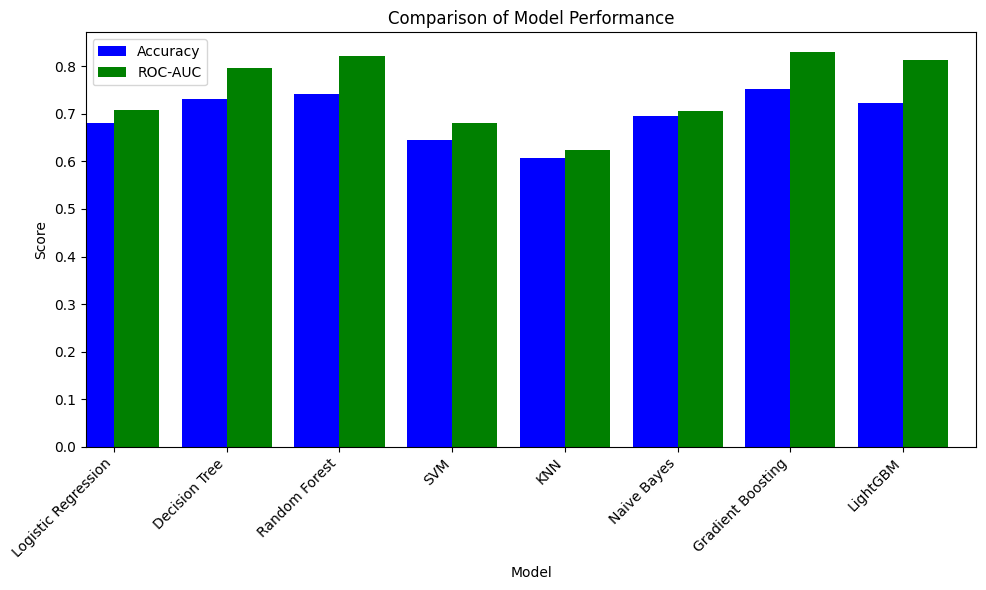

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot for Accuracy vs ROC-AUC
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy
model_comparison.plot(x='Model', y='Accuracy', kind='bar', ax=ax, position=1, color='b', width=0.4, label='Accuracy')

# Plot ROC-AUC
model_comparison.plot(x='Model', y='ROC-AUC', kind='bar', ax=ax, position=0, color='g', width=0.4, label='ROC-AUC')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Fit the models first
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1282, number of negative: 1318
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2600, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493077 -> initscore=-0.027694
[LightGBM] [Info] Start training from score -0.027694


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

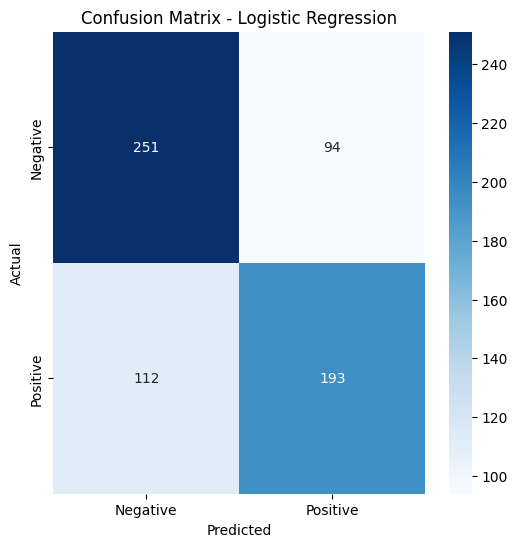

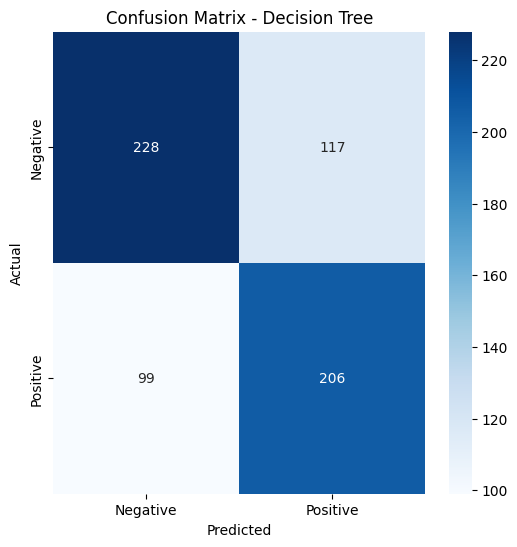

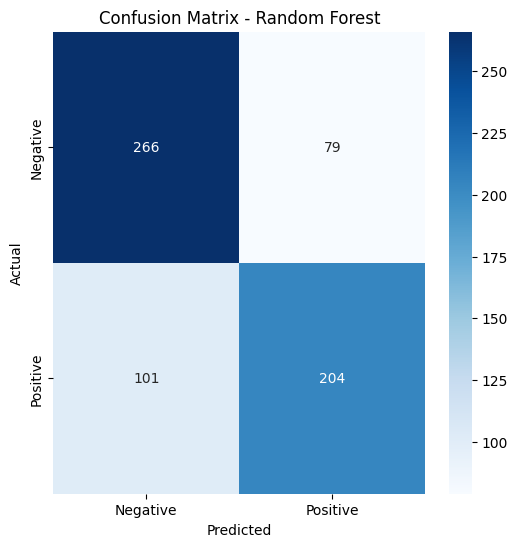

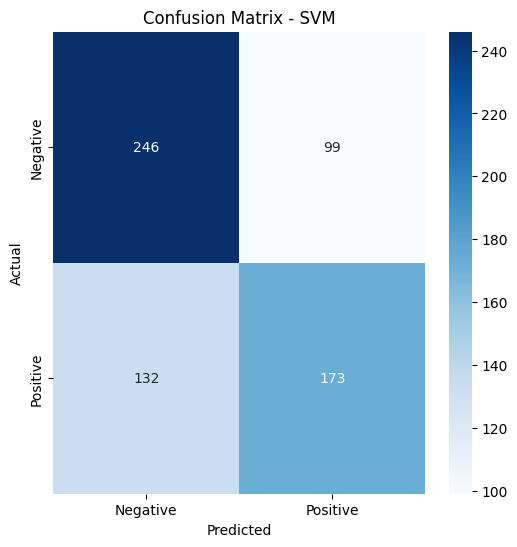

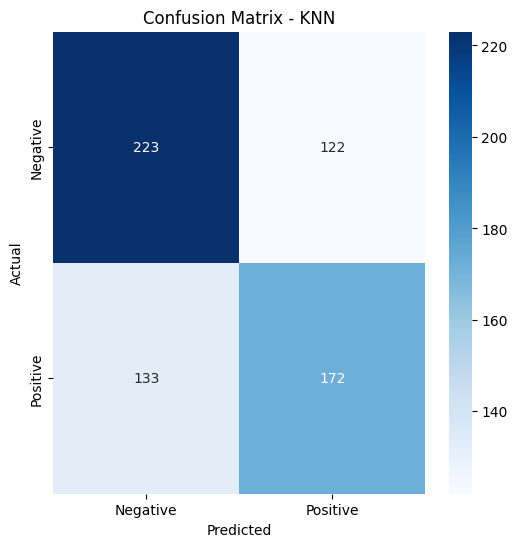

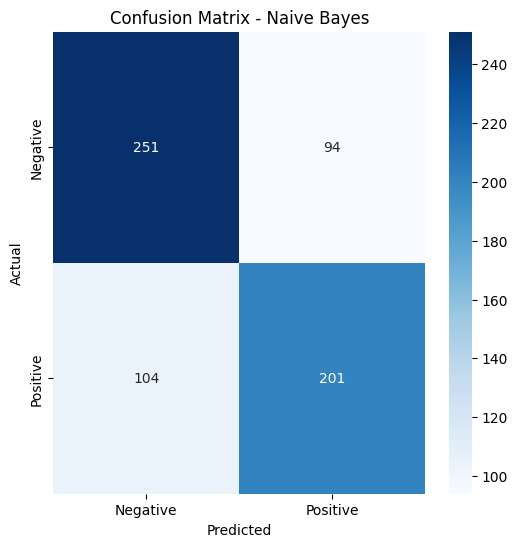

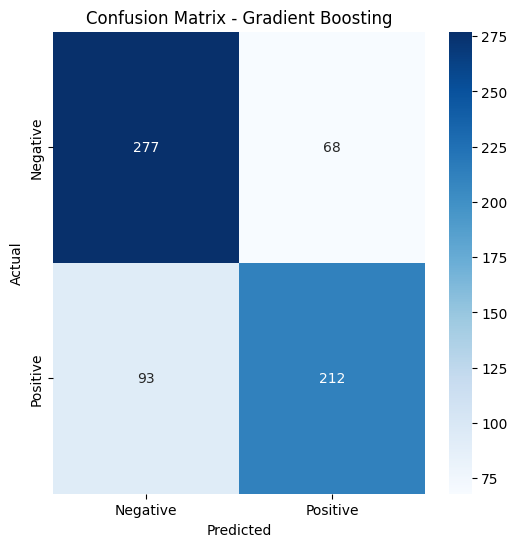

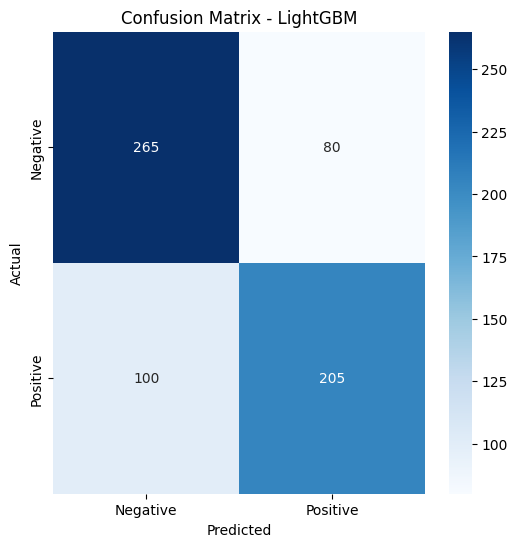

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(logistic_model, X_test, y_test, 'Logistic Regression')
plot_confusion_matrix(decision_tree_model, X_test, y_test, 'Decision Tree')
plot_confusion_matrix(random_forest_model, X_test, y_test, 'Random Forest')
plot_confusion_matrix(svm_model, X_test, y_test, 'SVM')
plot_confusion_matrix(knn_model, X_test, y_test, 'KNN')
plot_confusion_matrix(nb_model, X_test, y_test, 'Naive Bayes')
plot_confusion_matrix(gbm_model, X_test, y_test, 'Gradient Boosting')
plot_confusion_matrix(lgb_model, X_test, y_test, 'LightGBM')


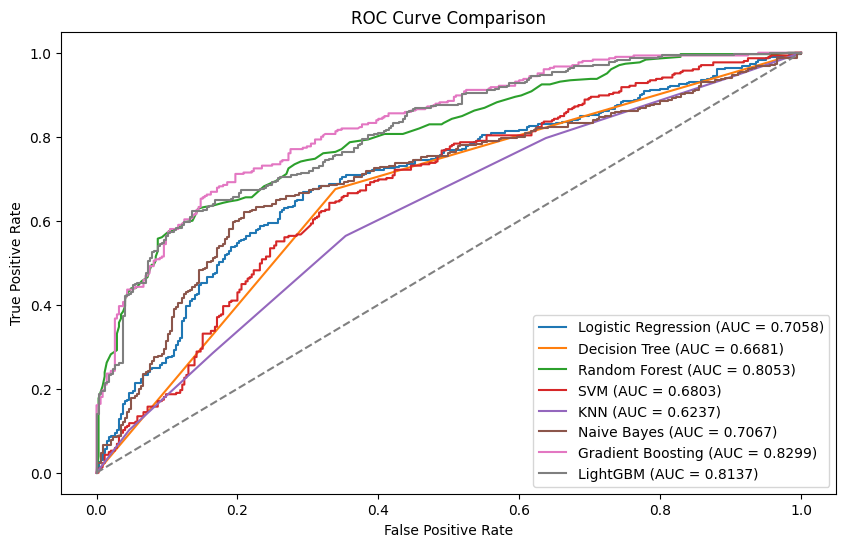

In [ ]:
from sklearn.metrics import roc_curve

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

plot_roc_curve(logistic_model, X_test, y_test, 'Logistic Regression')
plot_roc_curve(decision_tree_model, X_test, y_test, 'Decision Tree')
plot_roc_curve(random_forest_model, X_test, y_test, 'Random Forest')
plot_roc_curve(svm_model, X_test, y_test, 'SVM')
plot_roc_curve(knn_model, X_test, y_test, 'KNN')
plot_roc_curve(nb_model, X_test, y_test, 'Naive Bayes')
plot_roc_curve(gbm_model, X_test, y_test, 'Gradient Boosting')
plot_roc_curve(lgb_model, X_test, y_test, 'LightGBM')

# Add labels and title
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


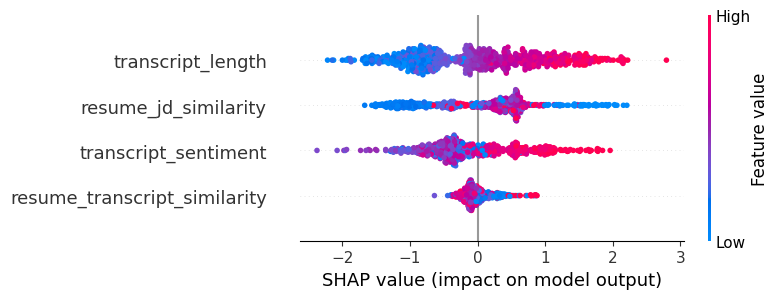

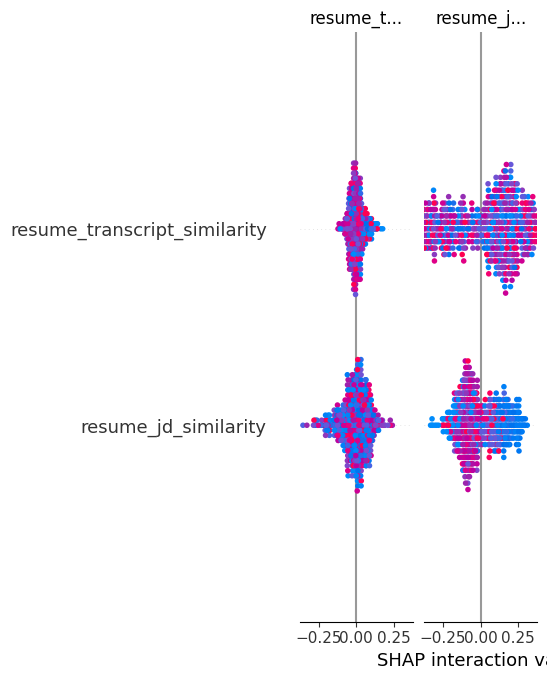

In [ ]:
import shap

# SHAP analysis for tree-based models
explainer_gbm = shap.TreeExplainer(gbm_model)
shap_values_gbm = explainer_gbm.shap_values(X_test)
shap.summary_plot(shap_values_gbm, X_test)

explainer_rf = shap.TreeExplainer(random_forest_model)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE

# Correct models_with_importance dictionary
models_with_importance = {
    'Logistic Regression': lambda: np.abs(logistic_model.coef_[0]),
    'Decision Tree': lambda: decision_tree_model.feature_importances_,
    'Random Forest': lambda: random_forest_model.feature_importances_,
    'SVM': lambda: np.abs(svm_model.coef_[0]) if hasattr(svm_model, 'coef_') else None,
    'KNN': lambda: RFE(knn_model, n_features_to_select=4).fit(X_train, y_train).ranking_,  # Adjust to number of features
    'Naive Bayes': lambda: np.var(nb_model.theta_, axis=0),  # Variance of theta across classes
    'Gradient Boosting': lambda: gbm_model.feature_importances_,  # Ensure correct variable name
    'LightGBM': lambda: lgb_model.booster_.feature_importance()  # Correct method for feature importance
}

# Ensure you have defined the gbm_model and lgb_model variables
# Example for Gradient Boosting:
# from sklearn.ensemble import GradientBoostingClassifier
# gbm_model = GradientBoostingClassifier()
# gbm_model.fit(X_train, y_train)

# Example for LightGBM:
# import lightgbm as lgb
# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(X_train, y_train)

# Get feature names (assuming they are stored in X_train columns)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i+1}' for i in range(X_train.shape[1])]

# Store the results for feature importance
importance_results = {}

# Loop through models and get the top features
for model_name, importance_func in models_with_importance.items():
    importance = importance_func()

    if importance is not None:
        if model_name == 'KNN':  # RFE returns ranking, so we need to adjust it
            sorted_idx = np.argsort(importance)
            top_features = np.array(feature_names)[sorted_idx][:4]  # Top features according to your dataset size
        else:
            sorted_idx = np.argsort(importance)[::-1]
            top_features = np.array(feature_names)[sorted_idx][:4]  # Top features

        importance_results[model_name] = top_features

# Convert the results into a DataFrame for better visualization
df = pd.DataFrame(importance_results)

# Display the table of top features
print("Top Features for Each Model:")
df

Top Features for Each Model:


,Logistic Regression,Decision Tree,Random Forest,KNN,Naive Bayes,Gradient Boosting,LightGBM
0,transcript_sentiment,resume_jd_similarity,transcript_length,resume_jd_similarity,transcript_length,transcript_length,resume_jd_similarity
1,resume_jd_similarity,transcript_length,resume_jd_similarity,resume_transcript_similarity,transcript_sentiment,resume_jd_similarity,resume_transcript_similarity
2,resume_transcript_similarity,transcript_sentiment,transcript_sentiment,transcript_sentiment,resume_transcript_similarity,transcript_sentiment,transcript_length
3,transcript_length,resume_transcript_similarity,resume_transcript_similarity,transcript_length,resume_jd_similarity,resume_transcript_similarity,transcript_sentiment


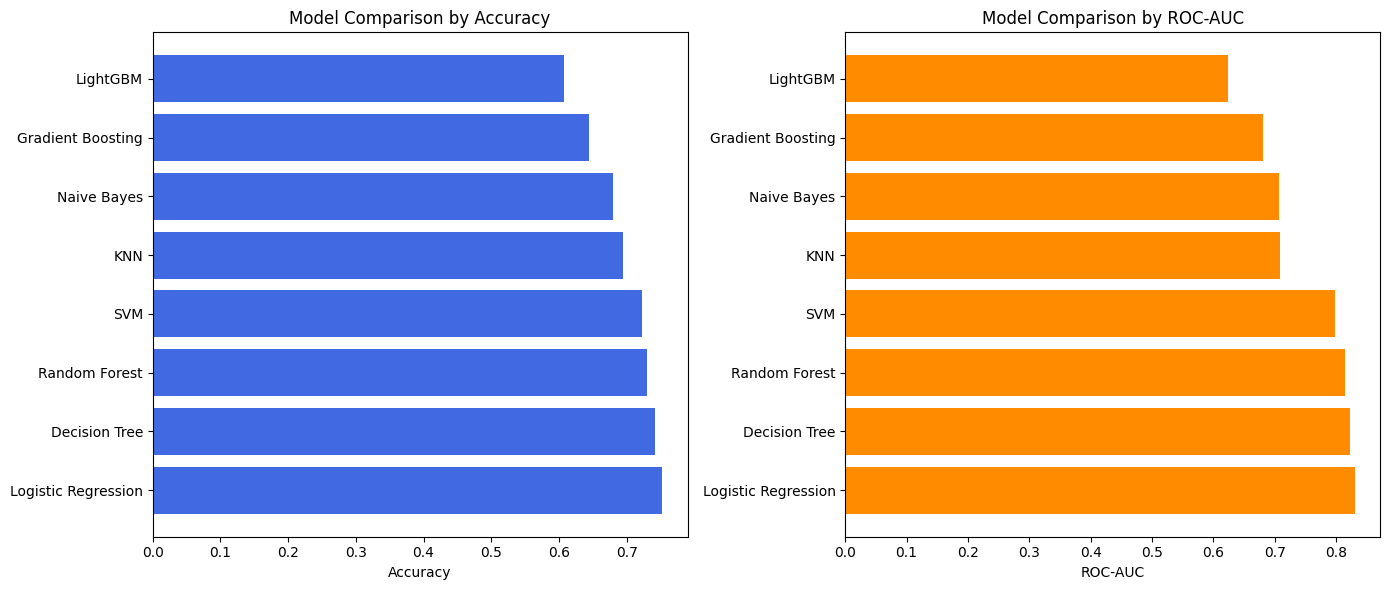

Best Model based on Accuracy: Gradient Boosting
Best Model based on ROC-AUC: Gradient Boosting


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Collecting accuracy and ROC-AUC scores for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'LightGBM']
accuracy_scores = [
    accuracy_logistic,
    accuracy_decision_tree,
    accuracy_random_forest,
    accuracy_svm,
    accuracy_knn,
    accuracy_nb,
    accuracy_gbm,
    accuracy_lgb
]
roc_auc_scores = [
    roc_auc_logistic,
    roc_auc_decision_tree,
    roc_auc_random_forest,
    roc_auc_svm,
    roc_auc_knn,
    roc_auc_nb,
    roc_auc_gbm,
    roc_auc_lgb
]

# Sorting models by Accuracy and ROC-AUC
accuracy_sorted_idx = np.argsort(accuracy_scores)[::-1]
roc_auc_sorted_idx = np.argsort(roc_auc_scores)[::-1]

# Create subplots for visualizing accuracy and ROC-AUC scores
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for accuracy scores
ax[0].barh(models, np.array(accuracy_scores)[accuracy_sorted_idx], color='royalblue')
ax[0].set_title('Model Comparison by Accuracy')
ax[0].set_xlabel('Accuracy')

# Bar chart for ROC-AUC scores
ax[1].barh(models, np.array(roc_auc_scores)[roc_auc_sorted_idx], color='darkorange')
ax[1].set_title('Model Comparison by ROC-AUC')
ax[1].set_xlabel('ROC-AUC')

# Display the plot
plt.tight_layout()
plt.show()

# Print best model based on accuracy and ROC-AUC
best_model_accuracy = models[accuracy_sorted_idx[0]]
best_model_roc_auc = models[roc_auc_sorted_idx[0]]

print(f"Best Model based on Accuracy: {best_model_accuracy}")
print(f"Best Model based on ROC-AUC: {best_model_roc_auc}")


Significant insights and takeaways from various machine learning models highlight their unique characteristics, strengths, and limitations. Logistic Regression stands out as a simple and interpretable model ideal for binary classification tasks, particularly with linearly separable data. However, it struggles when faced with complex non-linear relationships and outliers. Decision Trees offer a highly interpretable tree-like structure for decision-making but are prone to overfitting, especially when the tree depth becomes excessive.

Random Forests mitigate overfitting by combining multiple decision trees into an ensemble, providing better generalization and accuracy at the cost of increased computational requirements. Support Vector Machines (SVMs) excel in high-dimensional spaces and with clearly separable margins, though they can be computationally expensive and challenging to tune for large datasets. Similarly, K-Nearest Neighbors (KNN) is a straightforward, non-parametric algorithm effective for complex decision boundaries but tends to be slow and resource-intensive for large datasets.

Naive Bayes, grounded in Bayes' Theorem, is fast and efficient, especially for large datasets, thanks to its assumption of feature independence, though this assumption limits its applicability in more complex scenarios. Gradient Boosting leverages sequential tree building to enhance accuracy, delivering strong performance while requiring careful tuning to prevent overfitting. LightGBM builds upon gradient boosting by offering a more efficient and scalable framework tailored for large datasets, combining faster training times and better memory efficiency with the need for meticulous parameter tuning. Each model offers valuable tools tailored to specific data characteristics and problem requirements.

#Best Model:  

**Gradient Boosting** emerges as the top model, offering the highest accuracy and superior handling of complex datasets.